In [1]:
'''
The attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. 
The actual gender and predicted gender of each customer is also provided.

Assemble a dataframe with one row per customer and the following columns: customer_id, gender, most_recent_order_date,
order_count (number of orders placed by this customer).
Sort the dataframe by customer_id ascending and display the first 10 rows.
'''


'\nFull Name: SNEHA MAHARJAN\nEmail address: snehamaharjan2019@gmail.com\nMobile number: 857-204-3547\n\nThe attached CSV file lists the customer, date, and dollar value of orders placed at a store in 2017. \nThe actual gender and predicted gender of each customer is also provided.\n\nAssemble a dataframe with one row per customer and the following columns: customer_id, gender, most_recent_order_date,\norder_count (number of orders placed by this customer).\nSort the dataframe by customer_id ascending and display the first 10 rows.\n'

In [2]:
#PART A

# importing pandas and other required modules
import pandas as pd 
from IPython.display import display  
import matplotlib.pyplot as plt

# reading csv file from url  
data = pd.read_csv("/home/maharjans/screening_exercise_orders_v201810.csv") 
   
# dropping null value columns to avoid errors 
data.dropna(inplace = True) 
  
# initial df display 
data [0:10]


,customer_id,gender,date,value,predicted_gender
0,1000,0,2017-01-01 00:11:31,198.50,1
1,1001,0,2017-01-01 00:29:56,338.00,1
2,1002,1,2017-01-01 01:30:31,733.00,1
3,1003,1,2017-01-01 01:34:22,772.00,1
4,1004,0,2017-01-01 03:11:54,508.00,1
5,1005,1,2017-01-01 10:08:05,338.00,0
6,1006,1,2017-01-01 15:42:57,1526.43,1
7,1007,0,2017-01-01 15:59:50,168.00,0
8,1008,0,2017-01-01 18:01:04,207.99,0
9,1009,1,2017-01-01 19:27:17,283.00,1


In [3]:
#customer_id is made index
data = data.set_index('customer_id')

# new data frame with split value columns 
new = data["date"].str.split(" ", n = 1, expand = True) 

#new dataframe's columns extracted as date and timestamp columns in old dataframe
data["date"] = new[0]
data["timestamp"] = new[1]

#checking order of the current dataframe 
display(data[0:10])
display(data[1000:1010])

#storing the current dataframe into another dataframe for future use
original_data = data


,gender,date,value,predicted_gender,timestamp
customer_id,,,,,
1000,0,2017-01-01,198.50,1,00:11:31
1001,0,2017-01-01,338.00,1,00:29:56
1002,1,2017-01-01,733.00,1,01:30:31
1003,1,2017-01-01,772.00,1,01:34:22
1004,0,2017-01-01,508.00,1,03:11:54
1005,1,2017-01-01,338.00,0,10:08:05
1006,1,2017-01-01,1526.43,1,15:42:57
1007,0,2017-01-01,168.00,0,15:59:50
1008,0,2017-01-01,207.99,0,18:01:04


,gender,date,value,predicted_gender,timestamp
customer_id,,,,,
1143,1,2017-01-25,161.68,1,22:33:25
1895,0,2017-01-25,168.54,1,23:12:56
1896,0,2017-01-25,60.00,0,23:28:01
1897,0,2017-01-26,1078.41,1,00:29:53
1898,1,2017-01-26,420.26,1,01:23:53
1899,0,2017-01-26,10.00,1,01:34:24
1728,0,2017-01-26,291.52,0,02:02:35
1777,0,2017-01-26,198.00,1,02:42:11
1900,0,2017-01-26,754.92,0,02:48:30


In [4]:
#sorting by customer_id
data = data.sort_values(by = ['customer_id'], ascending = True)
display(original_data[0:10])


,gender,date,value,predicted_gender,timestamp
customer_id,,,,,
1000,0,2017-01-01,198.50,1,00:11:31
1001,0,2017-01-01,338.00,1,00:29:56
1002,1,2017-01-01,733.00,1,01:30:31
1003,1,2017-01-01,772.00,1,01:34:22
1004,0,2017-01-01,508.00,1,03:11:54
1005,1,2017-01-01,338.00,0,10:08:05
1006,1,2017-01-01,1526.43,1,15:42:57
1007,0,2017-01-01,168.00,0,15:59:50
1008,0,2017-01-01,207.99,0,18:01:04


In [5]:
#making separate column for most recent order date by getting the maximum date for each customer id
data['most_recent_order_date'] = data.groupby(['customer_id'])['date'].max()
display(data[0:10])


,gender,date,value,predicted_gender,timestamp,most_recent_order_date
customer_id,,,,,,
1000,0,2017-01-01,198.5,1,00:11:31,2017-01-01
1001,0,2017-01-01,338.0,1,00:29:56,2017-01-01
1002,1,2017-01-01,733.0,1,01:30:31,2017-02-19
1002,1,2017-02-19,176.0,1,21:35:31,2017-02-19
1002,1,2017-01-23,148.6,1,04:33:38,2017-02-19
1003,1,2017-01-01,772.0,1,01:34:22,2017-04-26
1003,1,2017-01-20,425.5,1,05:56:10,2017-04-26
1003,1,2017-04-25,0.0,1,09:54:54,2017-04-26
1003,1,2017-04-26,704.0,1,02:37:20,2017-04-26


In [6]:
#made new order_count dataframe to count total number of orders for each customer id
order_count = data.groupby('customer_id').sum()
display(order_count[0:5])


,gender,value,predicted_gender
customer_id,,,
1000,0,198.5,1
1001,0,338.0,1
1002,3,1057.6,3
1003,4,1901.5,4
1004,0,508.0,1


In [7]:
#making order_count column from value column of previous dataframe
data['order_count'] = order_count['value']
display(data[0:5])

,gender,date,value,predicted_gender,timestamp,most_recent_order_date,order_count
customer_id,,,,,,,
1000,0,2017-01-01,198.5,1,00:11:31,2017-01-01,198.5
1001,0,2017-01-01,338.0,1,00:29:56,2017-01-01,338.0
1002,1,2017-01-01,733.0,1,01:30:31,2017-02-19,1057.6
1002,1,2017-02-19,176.0,1,21:35:31,2017-02-19,1057.6
1002,1,2017-01-23,148.6,1,04:33:38,2017-02-19,1057.6


In [8]:
#Only extracting customer_id, gender, most_recent_order_date, order_count
data=data.drop(['date','value','predicted_gender','timestamp'], axis=1)
display(data[0:5])

,gender,most_recent_order_date,order_count
customer_id,,,
1000,0,2017-01-01,198.5
1001,0,2017-01-01,338.0
1002,1,2017-02-19,1057.6
1002,1,2017-02-19,1057.6
1002,1,2017-02-19,1057.6


In [9]:
#FINAL step for PART A

#dropping duplicate customer_ids, we now have the most recent order date and total order count for each id 
data = data.drop_duplicates(keep='first')
display(data[0:10])

,gender,most_recent_order_date,order_count
customer_id,,,
1000,0,2017-01-01,198.50
1001,0,2017-01-01,338.00
1002,1,2017-02-19,1057.60
1003,1,2017-04-26,1901.50
1004,0,2017-01-01,508.00
1005,1,2017-12-16,458.60
1006,1,2017-05-09,4936.40
1007,0,2017-01-01,168.00
1008,0,2017-12-17,549.57


,value
date,
2017-01-01,6915.92
2017-01-08,54615.45
2017-01-15,90954.20
2017-01-22,127004.75
2017-01-29,73081.92


['value']


Text(0.5, 1.0, 'Total orders per week')

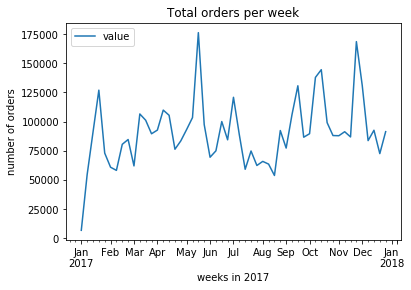

In [10]:
# PART B - Plot the count of orders per week for the store.
'''
By default the "date" column could be in string format, so we need to convert it into date-time format 
We know that resampling works with time-series data only so convert "date" column to index 
'''
df = pd.read_csv("/home/maharjans/screening_exercise_orders_v201810.csv", parse_dates =["date"], index_col ="date") 

#dropping unwanted columns for this part
df  = df.drop(['customer_id','gender','predicted_gender'], axis = 1)

# Resampling the time series data based on weekly frequency 
weekly_resampled_data = df.resample('W').sum() 
display(weekly_resampled_data[0:5])

#checking the column names
print(list(weekly_resampled_data.columns.values))

weekly_resampled_data.reset_index().plot(x='date', y='value')
plt.xlabel('weeks in 2017')
plt.ylabel('number of orders')
plt.title('Total orders per week')


In [11]:
#PART C - Compute the mean order value for gender 0 and for gender 1. Do you think the difference is significant?

#creating a new dataframe from the csv file
df_2 = pd.read_csv("/home/maharjans/screening_exercise_orders_v201810.csv") 
#setting gender as index
df_2 = df_2.set_index('gender')

#grouping by gender to see mean, standard deviation, maximum and minimum amounts of the Value column for each gender
df_2['mean'] = df_2.groupby(['gender'])['value'].mean()
df_2['standard deviation'] = df_2.groupby(['gender'])['value'].std()
df_2['maximum'] = df_2.groupby(['gender'])['value'].max()
df_2['minimum'] = df_2.groupby(['gender'])['value'].min()

#dropping unwanted columns
df_2 = df_2.drop(['date','customer_id','predicted_gender','value'], axis = 1)
display(df_2[0:5])

#dropping duplicate rows for each gender, keeping only the first instance
df_2 = df_2.drop_duplicates(keep = 'first')
display(df_2)

,mean,standard deviation,maximum,minimum
gender,,,,
0,363.890006,396.533215,8046.3,0.0
0,363.890006,396.533215,8046.3,0.0
1,350.708361,377.504737,6877.0,0.0
1,350.708361,377.504737,6877.0,0.0
0,363.890006,396.533215,8046.3,0.0


,mean,standard deviation,maximum,minimum
gender,,,,
0,363.890006,396.533215,8046.3,0.0
1,350.708361,377.504737,6877.0,0.0


In [12]:
'''
#Reflection

The difference was not that significant considering the range of values that were present from maximum to minimum.
But mean sometimes is not an accurate measure to compare the characteristics of the 2 genders/categories
because there can be lots of variations in values; higher values can level out smaller ones 
or a few extremely high values can raise the mean significantly, and so on.

Standard deviation tells us how measurements for a group are spread out from the average or mean
Lower standard deviation (gender = 1) says that most of the numbers are close to the average. 
Higher standard deviation (gender = 0) says that the numbers are more spread out from the average.
'''

'\n#Reflection\n\nThe difference was not that significant considering the range of values that were present from maximum to minimum.\nBut mean sometimes is not an accurate measure to compare the characteristics of the 2 genders/categories\nbecause there can be lots of variations in values; higher values can level out smaller ones \nor a few extremely high values can raise the mean significantly, and so on.\n\nStandard deviation tells us how measurements for a group are spread out from the average or mean\nLower standard deviation (gender = 1) says that most of the numbers are close to the average. \nHigher standard deviation (gender = 0) says that the numbers are more spread out from the average.\n'

In [13]:
#PART D - Assuming a single gender prediction was made for each customer, generate a confusion matrix for predicted gender. 

#creating a new dataframe from the csv file
confusion = pd.read_csv("/home/maharjans/screening_exercise_orders_v201810.csv") 
#checking column names
print(list(confusion.columns.values))

#sorting values by customer id
confusion = confusion.sort_values(by = ['customer_id'], ascending = True)

#dropping unwanted columns
confusion = confusion.drop(['date','value'], axis = 1)

#dropping duplicate rows
confusion = confusion.drop_duplicates(keep='first')

#setting customer id as the index
confusion = confusion.set_index('customer_id')

#displaying first 10 rows of the confusion dataframe
display(confusion[0:10])

['customer_id', 'gender', 'date', 'value', 'predicted_gender']


,gender,predicted_gender
customer_id,,
1000,0,1
1001,0,1
1002,1,1
1003,1,1
1004,0,1
1005,1,0
1006,1,1
1007,0,0
1008,0,0


In [14]:
#getting sum of the values in the gender column
actual_total = confusion['gender'].sum()
print("Actual data for gender = 1 is ",actual_total)

#getting sum of the values in the predicted_gender column
predicted_total = confusion['predicted_gender'].sum()
print("Predicted data for gender = 1 is ",predicted_total)

#checking accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy score: ", accuracy_score(confusion['gender'], confusion['predicted_gender']))

Actual data for gender = 1 is  4407
Predicted data for gender = 1 is  5730
Accuracy score:  0.6468118901747221


[[2189 2218]
 [ 895 3512]]


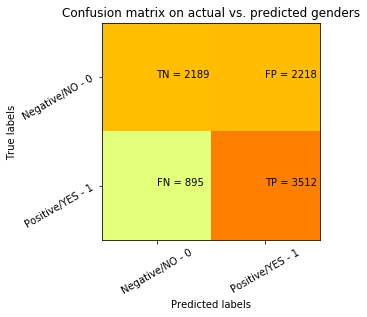

In [15]:
from sklearn.metrics import confusion_matrix
import numpy as np

#creating the confusion matrix from sklearn
cm = confusion_matrix(confusion['gender'], confusion['predicted_gender'])
print(cm)

plt.imshow(cm,cmap=plt.cm.Wistia)
classes = ['Negative/NO - 0','Positive/YES - 1']
plt.title('Confusion matrix on actual vs. predicted genders')
plt.ylabel('True labels')
plt.xlabel('Predicted labels')

#creating a range based on our classes
ticks = np.arange(len(classes))

#plotting the ticks along x and y axes
plt.xticks(ticks, classes, rotation = 30)
plt.yticks(ticks, classes, rotation = 30)

#matrix of labels to go inside the plot
s = [['TN','FP'], ['FN', 'TP']]

#arranging the text for the confusion matrix
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
        
plt.show()

In [16]:
#classification report - model evaluation metrics
from sklearn.metrics import classification_report
print(classification_report(confusion['gender'], confusion['predicted_gender']))

             precision    recall  f1-score   support

          0       0.71      0.50      0.58      4407
          1       0.61      0.80      0.69      4407

avg / total       0.66      0.65      0.64      8814



In [17]:
#What does the confusion matrix tell you about the quality of the predictions?
'''
The confusion matrix gives us the following results:
True Negatives(predicted 0 and actual 0) = 2189
True Positives(predicted 1 and actual 1) = 3512
False Negatives(predicted 0 and actual 1) = 895
False Positives(predicted 1 and actual 0) = 2218

Furthermore, the actual total count of customers with gender = 0 was equal to the
actual count of customers with gender = 1 which were both 4407 each. 
Thus, the true data labels were equally split across the data.

The accuracy score was 0.6468118901747221.
The large number of False Positives shows that the majority error case was when 
the gender of the customer was predicted to be (1) but was actually (0).

'''

'\nThe confusion matrix gives us the following results:\nTrue Negatives(predicted 0 and actual 0) = 2189\nTrue Positives(predicted 1 and actual 1) = 3512\nFalse Negatives(predicted 0 and actual 1) = 895\nFalse Positives(predicted 1 and actual 0) = 2218\n\nFurthermore, the actual total count of customers with gender = 0 was equal to the\nactual count of customers with gender = 1 which were both 4407 each. \nThus, the true data labels were equally split across the data.\n\nThe accuracy score was 0.6468118901747221.\nThe large number of False Positives shows that the majority error case was when \nthe gender of the customer was predicted to be (1) but was actually (0).\n\n'

In [18]:
#PART E - Describe one of your favorite tools or techniques and give a small example of how it's helped you solve a problem. 
#Limit your answer to one paragraph.
'''
In my opnion, Scikit-Learn has been a real game-changer in the world of Python Machine Learning.
Scikit-learn provides a range of supervised and unsupervised learning algorithms which I used in my Data Science
class, and also did a final project on the Bostons Earnings Report of 2018. We were able to predict earnings just based on
a person's zipcode. I am also planning to use a clustering algorithm to make predictions for my Senior Design project 
where we are trying to detect Arterial Stenosis. We intend to cluster the stenosis cases and normal cases.
The ability to import algorithms and apply them to models made me grow fond of Scikit-Learn.
It has all the necessary features for Machine Learning:

Classification – Identifying the proper category for an object
Cross Validation- for estimating the performance of supervised models on unseen data
Regression – Predicting a continuous-valued attribute associated with an object
Clustering – Automatic grouping of similar objects into clusters
Dimensionality Reduction – Reducing the number of random variables to consider to increase accuracy of the model
Model Selection – Comparing, validating and choosing parameters and models
Preprocessing – Feature extraction and normalization

There are also tons of practical examples publicly accessible in the Scikit-learn website that provide
hands-on experience of their library.  

'''


"\nIn my opnion, Scikit-Learn has been a real game-changer in the world of Python Machine Learning.\nScikit-learn provides a range of supervised and unsupervised learning algorithms which I used in my Data Science\nclass, and also did a final project on the Bostons Earnings Report of 2018. We were able to predict earnings just based on\na person's zipcode. I am also planning to use a clustering algorithm to make predictions for my Senior Design project \nwhere we are trying to detect Arterial Stenosis. We intend to cluster the stenosis cases and normal cases.\nThe ability to import algorithms and apply them to models made me grow fond of Scikit-Learn.\nIt has all the necessary features for Machine Learning:\n\nClassification – Identifying the proper category for an object\nCross Validation- for estimating the performance of supervised models on unseen data\nRegression – Predicting a continuous-valued attribute associated with an object\nClustering – Automatic grouping of similar object